<a href="https://colab.research.google.com/github/ika-si/AI-Fri45/blob/main/math_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# pythonで主成分分析を実装する

## 0.準備編（射影による次元削減）

### 0-0. Google Colab のファイルを手元にコピーする
- この文を読めている時点でアクセスには成功している。
- 自身のGoogleドライブ上の好きな場所にこのファイルのコピーを作成しよう。
- 自身のローカルで実行していっても良いが、基本的にはGoogle Colabで進めることを想定している。
- **グループで準備編の空欄「　①　」から「　④　」までを埋めて、代表者がTAに報告しよう（誰か1名でよい）。TAは「全部あっている」「0-ほにゃららに間違いがある」のいずれかを判定する。**
  - **全部あっている場合は次のURLを知らされる。**
  - **間違いがある場合は一度戻って考えること。「0-ほにゃらら」は教えるが、そのどれが間違っているかは秘匿されるので、落ち着いて見直すこと。**

### 0-1. 特徴量が高次元だと困る！

元々の特徴量ベクトル$\boldsymbol{x}$が$d$次元の(列)ベクトルであったとしよう。これは数学的には$\boldsymbol{x} \in \mathbb{R}^d$と書く。$\mathbb{R}$というのは実数全体を表す文字であって、指数としての$d$を伴って「実数による$d$次元ベクトル」と言う意味になる。

ただ、特徴量が高次元になると、そのデータがどういった分布を持つデータかを視覚的に観察しにくくなる。そして実は、単に視覚的に観察しにくくなる以上に、特徴量が高次元になると色々と困ったことが起きる。

### 0-2. あやめのデータを読み込んで表示してみよう

次のセルのコードでは、pythonで代表的な機械学習ライブラリであるscikit-learnに含まれる[あやめのデータ](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)をロードして表示している。

あやめのデータセットは、3種のあやめ計150株を4次元の特徴量で表現したものからなる。人間の目では4次元の特徴量空間を見ることができないので、そのうちの2次元の組み合わせを一通りプロットしてみよう。

こうやって見ると、たとえば**「　①　」**と**「　②　」**の特徴量のみの2次元空間では、黄色と緑の点が混ざっている（＝線形分離できない）ことがわかる。

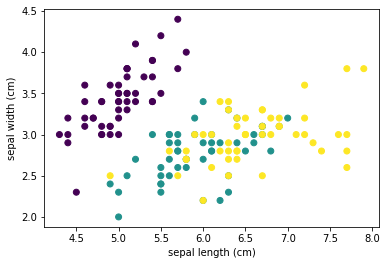

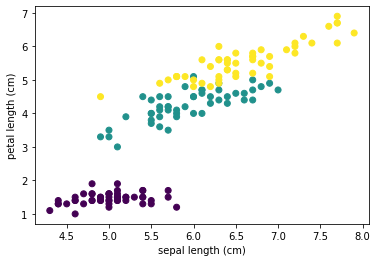

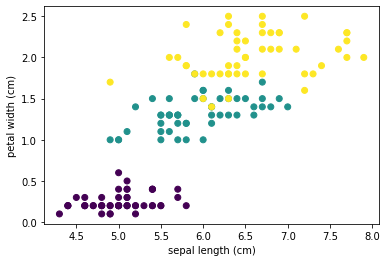

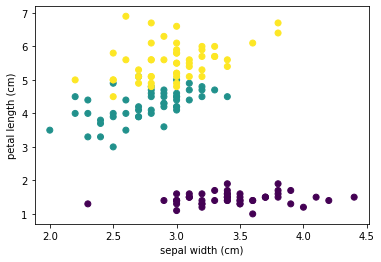

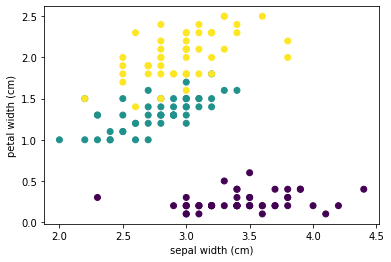

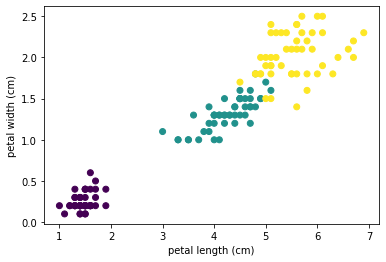

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import sklearn.datasets

# あやめデータセットを読み込んでいる
iris = sklearn.datasets.load_iris()

# 特徴量の（次元）数
# あやめデータセットは「花びらの長さ」「花びらの幅」「がくの長さ」「がくの幅」の4種類（つまり4次元特徴）
feature_numbers = len(iris.feature_names)

# 特徴量ベクトルの2つの次元の組み合わせを全部求めている
# 4種類の特徴量の2つを選ぶ組合せなので6つ
feature_combinations = itertools.combinations(range(len(iris.feature_names)), 2)
print(feature_combinations)

# feature_combinations の index 番目の組み合わせ（次元の配列） value について
for index, value in enumerate(feature_combinations):

    # 新たな図の領域
    plt.figure(index)
    # 2つの特徴量の組み合わせで2次元の散布図を描画
    plt.scatter(iris.data[:, value[0]], iris.data[:, value[1]], c=iris.target)
    # x成分の特徴量の名前をx軸に表示
    plt.xlabel(iris.feature_names[value[0]])
    # y成分の特徴量の名前をy軸に表示
    plt.ylabel(iris.feature_names[value[1]])


### 0-3. 射影とは何か

そこで、特徴量を2次元空間に無理やり射影して視覚化してみよう。具体的には、ランダムでよいから適当に$d$次元空間の特徴量を2次元空間に射影してみて、その分布をみてみようという訳である。

ランダムに決めた要素を持つ$d$行$c$列の行列$W$を考えよう。これは数学的には$W \in \mathbb{R}^{d \times c}$と書く。射影はつぎのような行列とベクトルの積で求められる。

$$\boldsymbol{x}'=W^\top \boldsymbol{x}$$

ここで、$\top$は転置記号である。これで得られたベクトル$\boldsymbol{x}'$は$c$次元ベクトルになっている。なので、$c=2$の時の$W$を使うと特徴量を2次元空間に射影していることになる。

[あやめのデータ](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)(4次元)を何度かランダムに2次元空間に射影をしてみる。$\boldsymbol{x}$を並べた行列$X$をもちいると、この射影先は

$$X' = W^\top X$$

となる。

次のセルのコードはランダムに$W$を生成して4次元特徴量による$X$を2次元の$X'$に射影し、散布図をプロットしている。pythonとnumpyでは行列$X$が転置された状態で格納されていることに注意してほしい。論文や教科書などでは各データが列ベクトルで表現されるのに対して、pythonとnumpyではメモリアクセスの効率性から各データが行ベクトルになっている。なので、python上では

$$(X')^\top = (W^\top X)^\top = 「　③　」^\top 「　④　」$$

と書くイメージである。

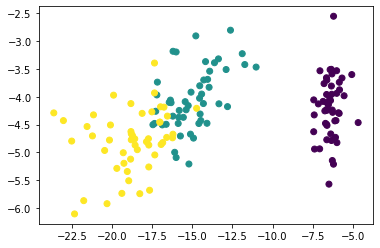

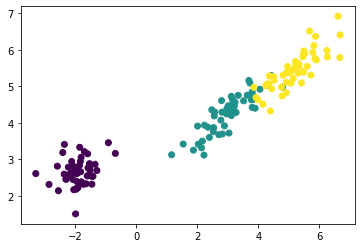

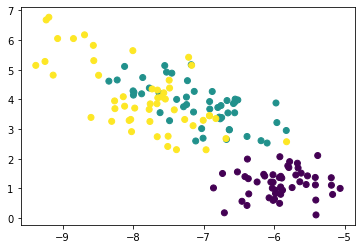

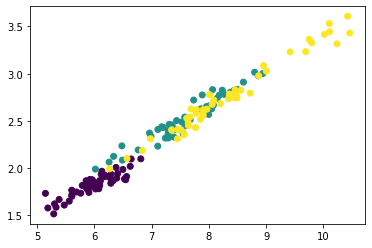

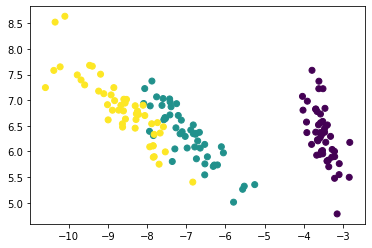

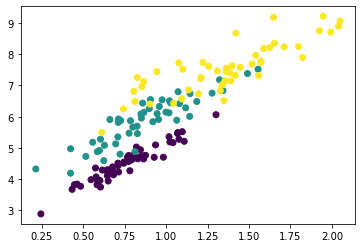

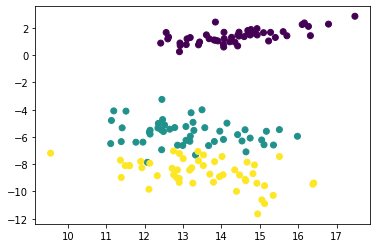

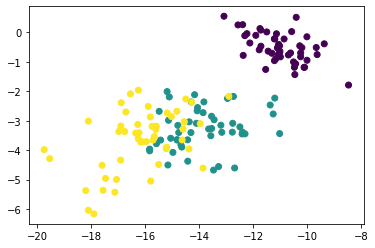

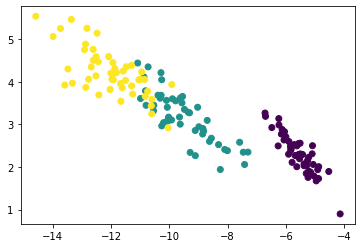

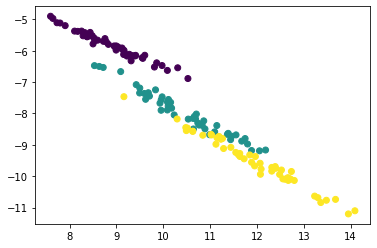

In [ ]:
# ためしに適当な射影行列で射影してみるとどうなるかを見てみよう

# 10回適当な射影をやった結果を見てみる
for i in range(10):

    # 新たな図の領域
    plt.figure(i)
    # あやめデータセットの特徴量 iris.data をランダムな4行2列行列で射影
    iris_random2d = np.matmul(iris.data, np.random.randn(4, 2))
    # 射影された2次元空間上でのあやめデータの分布をチェック
    # 色付けはあやめデータの各品種である iris.target を使用
    plt.scatter(iris_random2d[:, 0], iris_random2d[:, 1], c=iris.target)

違う品種同士の点が混ざり合ってしまっている時とそうでない時があることに気づくと思う。分類のことを考えるならば、違う品種のあやめのデータはそれぞれ混ざらないようになっていて欲しい。

このように、2次元空間に射影するときの$W$というのは何でも良いわけではなく、特定の条件を満たすような$W$を欲していることになる。そこで、今回は主成分分析と呼ばれる多変量解析手法を学んでいこう。